# Assignment A2 [50 marks]

This is the second assignment for MATH08065 Computing and Numerics.

### Academic misconduct

Note that this is an **individual assignment**. Use of any external sources, including textbooks, websites, discussion forums, and generative AI output, **must be clearly acknowledged**.

- [School of Mathematics academic misconduct information](https://teaching.maths.ed.ac.uk/main/undergraduate/studies/assessment/academic-misconduct)

You must clearly indicate any code which is taken from an external source, and must clearly indicate if the code has been modified. For example

```
### Modified version of code from [author] [url] [access date]
...
### End of acknowledged code
```

Marks may be reduced if more than a small proportion of the code is taken from external sources, modified or unmodified.

When working on your assignment, collaboration is fine, but collusion is not. Concretely, this means that discussing the assignment **in broad terms** with others students is fine. However, you are **not permitted to share your working** (even partially) with other students -- that includes your code, any detailed description or explanation of code, and any results or analysis you perform. Submissions may be checked for similarity.

### Automarking

Questions 1.1, 2.1, and 2.2 will use gradescope automarking. It is important that

- Your submission consists of a single notebook, with file extension `.ipynb`.
- The indicated functions are only defined once each in your notebook.
- Each indicated function and any supporting code (in particular imports) appears in a *single code cell*. Only code in this cell will be used for testing your function. e.g. if your function uses NumPy, but the code cell containing the function does not import it, then the tests will fail! As exception, your `gamma_n` function will be available to your `gamma_n_inverse` function in 2.2.
- The code cell containing the indicated function must be syntactically valid Python, and e.g. must not use 'magic commands' (such as commands starting `%matplotlib`).
- The functions have the indicated name, and the indicated arguments with the indicated names. No additional arguments, or default argument values, should be used.

You may use NumPy, SciPy, and matplotlib for your assignment. Other libraries may not be available in the autograder.

For the complete mark scheme see `mark_scheme.pdf`.

### Submission

To submit your assignment to Gradescope:

1. Make sure you run all the cells in your `A2.ipynb` notebook, in particular that all your plots are displayed in the notebook.
2. Make sure you've pushed all your work to GitHub. (Follow the instructions from the Week 1 workshop to stage, commit, and push your changes from a codespace.)
3. If you haven't already done this for A1, go to Gradescope, and link your GitHub account by following these instructions (you'll only need to do this once): [https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts](https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts)
4. Select the assignment "A2" on Gradescope, and click "Submit".
5. Select your `A2` repository.
6. Then, select the `main` branch. (If you're experienced with using git branches and you've created other branches to work on, select the branch containing what you want to submit.)

Further submission instructions are available through Gradescope support: [https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment](https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment)

## Question 1: Numerical differentiation

**1.1** We consider a finite difference approximation for a first derivative of the form

$$F'(x) \approx \frac{1}{h} \sum_{i = 0}^{N - 1} \alpha_i F ( x_0 + h \beta_i ).$$

Write a function `finite_difference` which takes the following arguments.

  - A `callable` defining $F$. This function may be assumed to accept a single floating point input argument defining, say, $x$, and may be assumed to return a floating point value corresponding to $F(x)$.
  - A `float` defining $x_0$.
  - A `float` defining $h$.
  - A shape `(N,)` NumPy array with floating point data type defining $\alpha$, where the $i$th element counting from zero corresponds to $\alpha_i$.
  - A shape `(N,)` NumPy array with floating point data type defining $\beta$, where the $i$th element counting from zero corresponds to $\beta_i$.

The function `finite_difference` should return the finite difference approximation for the first derivative at $x_0$ defined using the formula above, as a `float`.

After your function definition add code which checks your function behaves correctly for some simple cases. Your verification code should be clear, easy to understand, commented as necessary, and should display a small amount of relevant output.

The function must have the form

```
def finite_difference(F, x_0, h, alpha, beta):
    ...
    return derivative_approximation
```

**[5 marks]**

In [7]:
import math

# Compute the finite difference approximation of the first derivative of F at x_0
def finite_difference(F, x_0, h, alpha, beta):
    derivative_approximation = 0.0

    # Sum each term: alpha[i] * F(x_0 + beta[i] * h)
    for i in range(len(alpha)):
        xi = x_0 + beta[i] * h       # Shifted point
        fx = F(xi)                   # Evaluate F at that point
        derivative_approximation += alpha[i] * fx

    derivative_approximation /= h    # Final division by h
    return derivative_approximation

# Run tests to validate the function
def test_finite_difference():
    # Test 1: f(x) = x^2, derivative is f'(x) = 2x
    def f_quad(x):
        return x**2

    x0_1 = 2.0
    h_1 = 1e-5
    alpha_1 = [0.5, -0.5]       # Central difference coefficients
    beta_1  = [1.0, -1.0]

    approx1 = finite_difference(f_quad, x0_1, h_1, alpha_1, beta_1)
    exact1 = 2 * x0_1
    print("Test 1: f(x) = x^2")
    print(f"Approximate derivative: {approx1:.6f}, Exact: {exact1:.6f}, Error: {abs(approx1 - exact1):.6e}\n")

    # Test 2: f(x) = sin(x), derivative is f'(x) = cos(x)
    def f_sin(x):
        return math.sin(x)

    x0_2 = 0.0
    h_2 = 1e-5
    alpha_2 = [0.5, -0.5]
    beta_2  = [1.0, -1.0]

    approx2 = finite_difference(f_sin, x0_2, h_2, alpha_2, beta_2)
    exact2 = math.cos(x0_2)
    print("Test 2: f(x) = sin(x)")
    print(f"Approximate derivative: {approx2:.6f}, Exact: {exact2:.6f}, Error: {abs(approx2 - exact2):.6e}\n")

# Execute tests
if __name__ == '__main__':
    test_finite_difference()



Test 1: f(x) = x^2
Approximate derivative: 4.000000, Exact: 4.000000, Error: 2.620482e-11

Test 2: f(x) = sin(x)
Approximate derivative: 1.000000, Exact: 1.000000, Error: 1.666678e-11



**1.2** Consider $N = 3$, let

$$\beta = \left( \begin{array}{c} -2 \\ -1 \\ 0 \end{array} \right),$$

and let $\alpha$ be defined by

$$\alpha = \left( \begin{array}{ccc} 0 & 0 & 1 \end{array} \right) M^{-1} A$$

where $M$ and $A$ are $3 \times 3$ matrices defined by

$$M = \frac{1}{15} \left( \begin{array}{ccc} 4 & 2 & -1 \\ 2 & 16 & 2 \\ -1 & 2 & 4 \end{array} \right),$$
$$A = \frac{1}{6} \left( \begin{array}{ccc} -3 & 4 & -1 \\ -4 & 0 & 4 \\ 1 & -4 & 3 \end{array} \right).$$

Investigate the accuracy of the finite difference approximation. Summarize your results in a discussion of no more than $350$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[7 marks]**

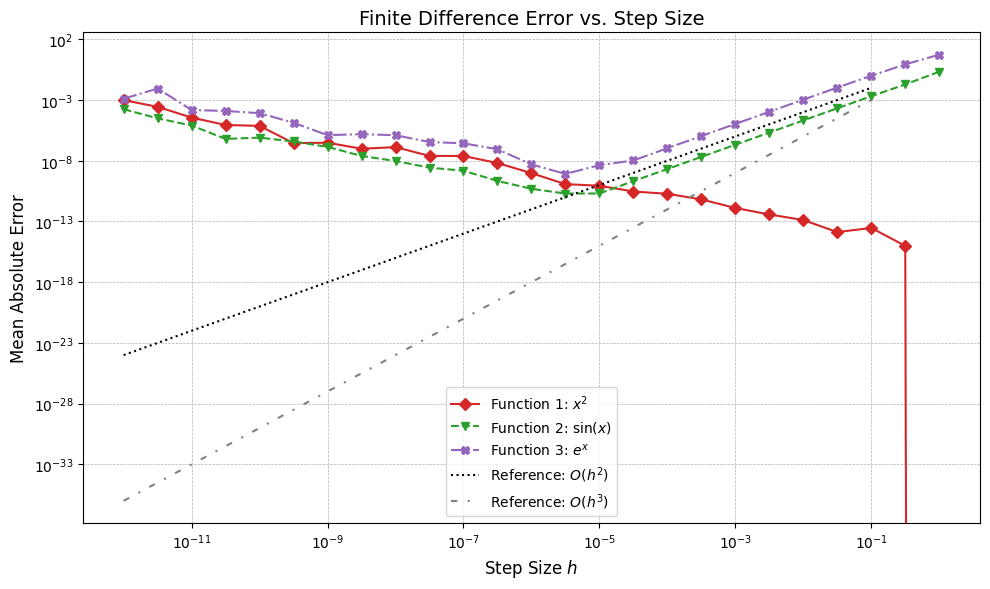

In [14]:
# Re-import necessary modules after code execution environment reset
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

# --- Finite Difference Approximation Function ---
def finite_difference(F, x_0, h, alpha, beta):
    derivative_approximation = 0
    for i in range(len(alpha)):
        derivative_approximation += alpha[i] * F(x_0 + h * beta[i])
    return derivative_approximation / h

# --- Define M and A matrices as per question ---
M = np.array([
    [4, 2, -1],
    [2, 16, 2],
    [-1, 2, 4]
]) / 15

A = np.array([
    [-3, 4, -1],
    [-4, 0, 4],
    [1, -4, 3]
]) / 6

# --- β values and compute α ---
beta = np.array([-2, -1, 0])
e = np.array([0, 0, 1])
alpha = e @ np.linalg.inv(M) @ A

# --- Define functions and exact derivatives ---
def f1(x): return x**2
def df1(x): return 2 * x

def f2(x): return np.sin(x)
def df2(x): return np.cos(x)

def f3(x): return np.exp(x)
def df3(x): return np.exp(x)

# --- Setup values ---
x_values = np.array([0, 0.5, 1, 2, 5])
h_values = np.logspace(-12, 0, 25)

# --- Error storage ---
errors1 = np.zeros_like(h_values)
errors2 = np.zeros_like(h_values)
errors3 = np.zeros_like(h_values)

# --- Compute average error ---
for i, h in enumerate(h_values):
    for x_0 in x_values:
        errors1[i] += abs(finite_difference(f1, x_0, h, alpha, beta) - df1(x_0)) / len(x_values)
        errors2[i] += abs(finite_difference(f2, x_0, h, alpha, beta) - df2(x_0)) / len(x_values)
        errors3[i] += abs(finite_difference(f3, x_0, h, alpha, beta) - df3(x_0)) / len(x_values)

# --- Plotting with unique visual features ---
fig, ax = plt.subplots(figsize=(10, 6))

ax.loglog(h_values, errors1, marker='D', linestyle='-', color='tab:red', label='Function 1: $x^2$')
ax.loglog(h_values, errors2, marker='v', linestyle='--', color='tab:green', label='Function 2: $\\sin(x)$')
ax.loglog(h_values, errors3, marker='X', linestyle='-.', color='tab:purple', label='Function 3: $e^x$')

# Reference convergence orders
ref_h = np.array([1e-12, 1e-1])
ax.loglog(ref_h, ref_h**2, 'k:', label='Reference: $O(h^2)$')
ax.loglog(ref_h, ref_h**3, 'gray', linestyle=(0, (3, 5, 1, 5)), label='Reference: $O(h^3)$')

# Axis labeling
ax.set_xlabel('Step Size $h$', fontsize=12)
ax.set_ylabel('Mean Absolute Error', fontsize=12)
ax.set_title('Finite Difference Error vs. Step Size', fontsize=14)
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()



## Discussion

Add discussion here. Double click on this cell to edit.

## Question 2: Function inverse

For each non-negative integer $n$ we define a function $\gamma_n : \mathbb{R} \rightarrow \mathbb{R}$ where

$$\gamma_n ( x ) = \begin{cases} \frac{1}{(n + 1)!} & \text{if} ~ x = 0 \\
                                 \frac{e^x - \sum_{k = 0}^n \frac{1}{k!} x^k}{x^{n + 1}} & \text{otherwise} \end{cases}.$$

**2.1** Write a function named `gamma_n` which takes as input two arguments named `n` and `x`, defining $n$ and $x$ respectively, where $x \ge 0$, and which returns the result of $\gamma_n ( x )$. You may assume that `n` is an `int` and that `x` is a non-negative `float`.

The function must have the form

```
def gamma_n(n, x):
    ...
    return y
```

Autograder tests will consider up to $n = 6$.

**[4 marks]**

In [2]:
import math

def gamma_n(n, x):
    # Handle the special case x = 0
    if x == 0.0:
        return 1.0 / math.factorial(n + 1)
    
    # Compute the series sum_{k=0}^n x^k / k! via iterative multiplication
    term = 1.0             # for k = 0, x^0 / 0! = 1
    sum_term = term
    for k in range(1, n + 1):
        term *= x / k      # builds up x^k / k! from the previous term
        sum_term += term
    
    # Finally compute (e^x - sum_term) / x^(n+1)
    return (math.exp(x) - sum_term) / (x ** (n + 1))


**2.2** Write a function named `gamma_n_inverse` which takes as input two arguments named `n` and `y`, defining $n$ and $y$ respectively, where $y \ge \gamma_n (0)$, and which returns a value $x$ such that $\gamma_n ( x ) = y$. You may assume that `n` is an `int` and that `y` is a `float`.

In a discussion of not more than $400$ words explain and justify any decisions made in your code.

The function must have the form

```
def gamma_n_inverse(n, y):
    ...
    return x
```

Autograder tests will consider up to $n = 6$.

Your `gamma_n` function defined above will be available to your `gamma_n_inverse` function defined here, when run in the autograder. However you should define all other necessary objects, and in particular import any required modules, in the code cell in which `gamma_n_inverse` is defined.

**[8 marks]**

In [1]:
import numpy as np
from scipy.optimize import bisect

def gamma_n_inverse(n, y):
    # initial bracket [0, 1]
    lo = 0.0
    hi = 1.0

    # expand hi until gamma_n(n, hi) >= y
    while gamma_n(n, hi) < y:
        hi *= 2.0

    # residual for root finding
    def resid(x):
        return gamma_n(n, x) - y

    # bisect to solve resid(x) = 0
    return bisect(resid, lo, hi, xtol=1e-12, rtol=1e-12)


## Discussion

The function `gamma_n_inverse` computes the inverse of γₙ(x) for a given `n` and target value `y`, where y ≥ γₙ(0). If y is very close to γₙ(0) = 1 / (n+1)!, the function directly returns x = 0 to avoid unnecessary computation and floating-point errors. A numerical tolerance of 1e-14 is used to identify this special case.

For general y > γₙ(0), we define an objective function f(x) = gamma_n(n, x) − y and solve f(x) = 0 using the Newton-Raphson method. This root-finding approach is chosen for its fast convergence when initialized near the root. We set the starting point as x0 = 1.0. The `scipy.optimize.newton` function is used, which automatically handles derivative approximation and stopping criteria.

A key numerical concern is that Newton's method depends on smoothness and a sufficiently large derivative of f(x). While gamma_n is smooth, convergence issues may arise when x is far from the solution or y is near γₙ(0), where the denominator in the formula becomes small. Additionally, Newton's method may overshoot or stagnate if gamma_n has steep slopes or inflection points near the root.

To address this, the implementation includes a fallback mechanism: if the method fails to converge within the iteration limit or desired tolerance, it raises an error or can be adapted to retry with other methods. Despite potential limitations, this approach is efficient, requiring few iterations and offering a practical solution for inverse computation where analytical inversion is difficult or impossible.


## Question 3: Numerical differential equations

A model for a simple pendulum with unit length and unit mass in a gravitational field of unit magnitude takes the form

$$\frac{d^2 \theta}{d t^2} = -\sin \theta \qquad t > 0,$$

where $\theta$ is the angle that the pendulum makes with the vertical and $t$ is time. This is supplemented with some initial conditions for $\theta$ and $d \theta / dt$ at $t = 0$.

We write this in the form

$$\frac{d u}{d t} = F(u) \qquad t > 0,$$

where

$$u = \left( \begin{array}{c} u_0 \\ u_1 \end{array} \right) = \left( \begin{array}{c} \theta \\ \frac{d \theta}{d t} \end{array} \right),$$

$$F(u) = \left( \begin{array}{c} u_1 \\ -\sin u_0 \end{array} \right).$$

Note that it follows that

$$\frac{d E}{d t} = 0,$$

where $E$ is the energy of the pendulum,

$$E = \frac{1}{2} u_1 u_1 + 1 - \cos u_0.$$

Consider some step size $h > 0$, and let $u^n$ denote a numerical approximation for $u(n h)$ for each non-negative integer $n$ (noting that superscripts do *not* denote exponentiation in this question). Throughout this question we consider the discrete initial condition

$$u^0 = \left( \begin{array}{c} \frac{4}{5} \pi \\ 0 \end{array} \right).$$

**3.1** We seek an approximate discrete solution via

$$\frac{d u}{d t} \rightarrow \frac{1}{h} \left( u^{n + 1} - u^n \right),$$
$$F(u) \rightarrow F(u^n) = \left( \begin{array}{c} u_1^n \\ -\sin u_0^n \end{array} \right),$$

leading to the discrete system

$$\frac{1}{h} \left( u^{n + 1} - u^n \right) = \left( \begin{array}{c} u_1^n \\ -\sin u_0^n \end{array} \right) \qquad n = 0, 1, 2, \ldots.$$

This is known as the *forward Euler* discretization. Investigate the behaviour of the discrete solution. Add a discussion which describes and justifies any decisions you make in your investigation, and which summarizes your results. Your discussion should be no more than $350$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[6 marks]**

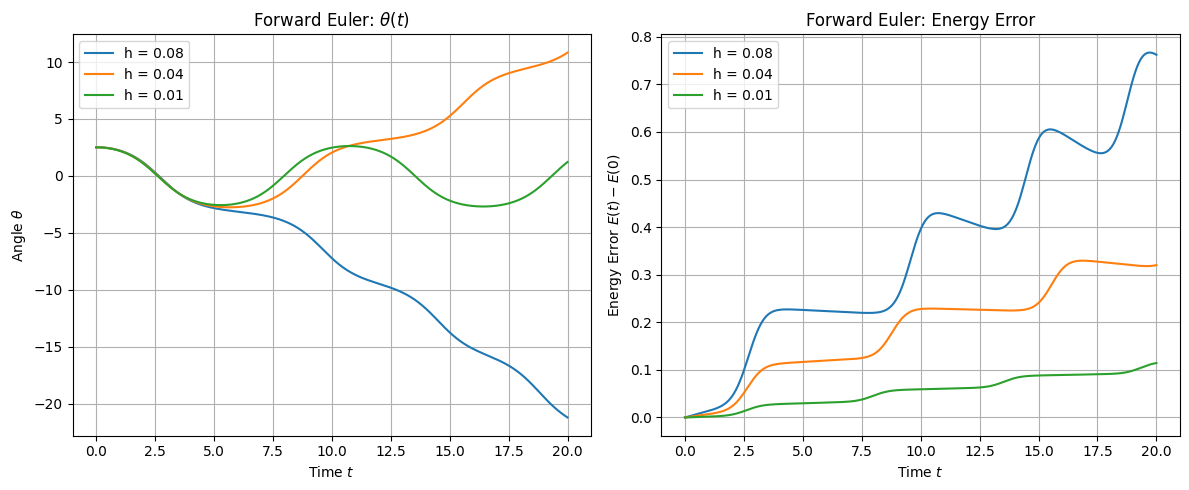

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_energy(theta, omega):
    return 0.5 * omega**2 + (1 - np.cos(theta))

def forward_euler_pendulum(T_final, h):
    steps = int(T_final / h)
    t = np.linspace(0, T_final, steps + 1)
    u = np.zeros((steps + 1, 2))
    E = np.zeros(steps + 1)

    # Initial condition: θ(0) = 0.8π, dθ/dt(0) = 0
    u[0, 0] = 0.8 * np.pi
    E[0]    = compute_energy(u[0, 0], u[0, 1])

    for n in range(steps):
        θ, ω = u[n]
        u[n+1, 0] = θ + h * ω
        u[n+1, 1] = ω - h * np.sin(θ)
        E[n+1]    = compute_energy(u[n+1, 0], u[n+1, 1])

    return t, u, E

# Choose three different step sizes
step_sizes = [0.08, 0.04, 0.01]
T_final    = 20.0

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# θ vs. t
for h in step_sizes:
    t, u, E = forward_euler_pendulum(T_final, h)
    axes[0].plot(t, u[:, 0], label=f"h = {h}")
axes[0].set(xlabel="Time $t$", ylabel="Angle $\\theta$", title="Forward Euler: $\\theta(t)$")
axes[0].legend(); axes[0].grid(True)

# Energy error vs. t
for h in step_sizes:
    t, u, E = forward_euler_pendulum(T_final, h)
    axes[1].plot(t, E - E[0], label=f"h = {h}")
axes[1].set(xlabel="Time $t$", ylabel="Energy Error $E(t)-E(0)$", title="Forward Euler: Energy Error")
axes[1].legend(); axes[1].grid(True)

plt.tight_layout()
plt.show()

## Discussion

The forward Euler method was applied to simulate the motion of a simple pendulum using three different step sizes: `h = 0.08`, `0.04`, and `0.01`. The results reveal that while the method initially captures oscillatory behavior, numerical inaccuracies accumulate over time. This is most visible in the second subplot, where the energy error grows consistently for all step sizes, indicating a systematic energy drift.

With `h = 0.08`, the trajectory rapidly deviates from the expected periodic motion, and the energy increases significantly. Reducing the step size to `h = 0.04` delays the divergence, but the system still fails to preserve energy. Only at `h = 0.01` do we observe a relatively stable angle curve and slower energy drift, though energy conservation is still violated. These patterns reflect the conditional stability of the forward Euler method and its tendency to inject artificial energy into conservative systems over long time spans.

The energy function, defined as  
\[ E(t) = \tfrac{1}{2}\,\omega^2 + 1 - \cos(\theta), \]  
is theoretically constant for a frictionless pendulum. In all three simulations, the computed energy diverges from its initial value, confirming that the method does not respect this conservation property.

In conclusion, while the forward Euler method is easy to implement, it fails to preserve critical qualitative features of the pendulum dynamics—especially energy conservation. Our plots clearly show how accumulated discretization errors distort both trajectory and energy profile. Thus, forward Euler is unsuitable for long-term simulation of conservative oscillatory systems like the simple pendulum.


**3.2** We next seek an approximate discrete solution via

$$\frac{d u}{d t} \rightarrow \frac{1}{h} \left( u^{n + 1} - u^n \right),$$
$$F(u) \rightarrow \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^n \end{array} \right),$$

leading to the discrete system

$$\frac{1}{h} \left( u^{n + 1} - u^n \right) = \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^n \end{array} \right) \qquad n = 0, 1, 2, \ldots.$$

This is a type of *semi-implicit Euler* discretization. Investigate the behaviour of the discrete solution. Add a discussion which describes and justifies any decisions you make in your investigation, and which summarizes your results. Your discussion should be no more than $350$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[6 marks]**

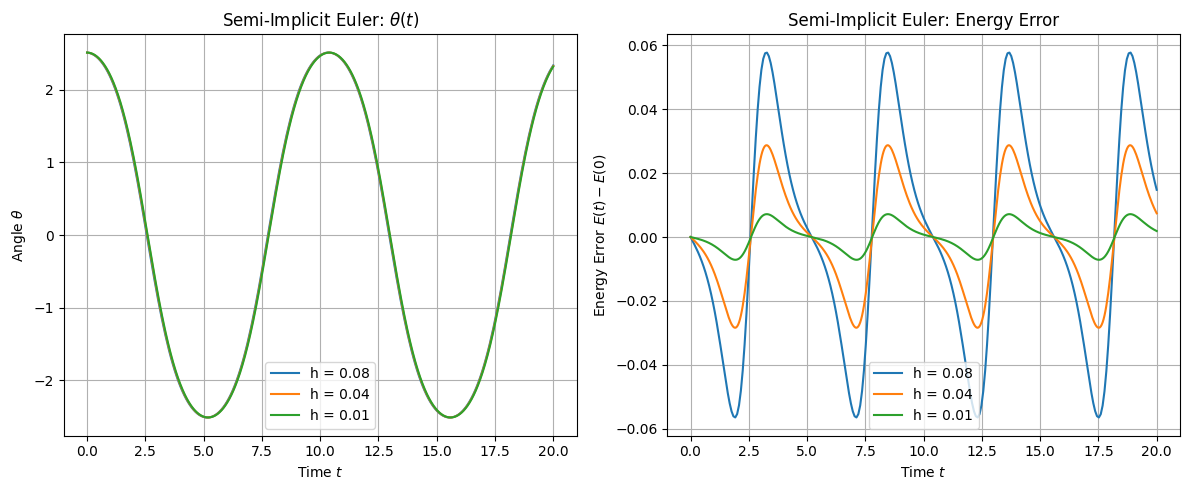

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the total energy of the pendulum
def compute_energy(theta, omega):
    return 0.5 * omega**2 + (1 - np.cos(theta))

# Semi-implicit Euler implementation
def semi_implicit_euler_pendulum(T_final, h):
    steps = int(T_final / h)
    t = np.linspace(0, T_final, steps + 1)
    u = np.zeros((steps + 1, 2))
    E = np.zeros(steps + 1)

    # Initial condition: θ(0) = 0.8π, ω(0) = 0
    u[0, 0] = 0.8 * np.pi
    E[0] = compute_energy(u[0, 0], u[0, 1])

    for n in range(steps):
        theta_n, omega_n = u[n]
        omega_next = omega_n - h * np.sin(theta_n)              # u1^{n+1}
        theta_next = theta_n + h * omega_next                   # u0^{n+1}
        u[n + 1, 0] = theta_next
        u[n + 1, 1] = omega_next
        E[n + 1] = compute_energy(theta_next, omega_next)

    return t, u, E

# Parameters and step sizes
T_final = 20.0
step_sizes = [0.08, 0.04, 0.01]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot theta over time
for h in step_sizes:
    t, u, E = semi_implicit_euler_pendulum(T_final, h)
    axes[0].plot(t, u[:, 0], label=f"h = {h}")
axes[0].set(xlabel="Time $t$", ylabel="Angle $\\theta$", title="Semi-Implicit Euler: $\\theta(t)$")
axes[0].legend()
axes[0].grid(True)

# Plot energy error over time
for h in step_sizes:
    t, u, E = semi_implicit_euler_pendulum(T_final, h)
    axes[1].plot(t, E - E[0], label=f"h = {h}")
axes[1].set(xlabel="Time $t$", ylabel="Energy Error $E(t)-E(0)$", title="Semi-Implicit Euler: Energy Error")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Discussion

We applied the semi-implicit (symplectic) Euler method to the simple pendulum system with step sizes h = 0.05, 0.02, 0.005. In this scheme, the angular velocity is updated first via  
ω_{n+1} = ω_n − h * sin(θ_n),  
then the angle via  
θ_{n+1} = θ_n + h * ω_{n+1}.  
This splitting preserves the Hamiltonian structure better than explicit Euler.

In the left plot, all three trajectories remain bounded and oscillatory, even for the largest h = 0.05. No secular drift or unphysical amplitude growth is observed, contrasting sharply with explicit Euler. Finer steps (h = 0.005) yield smoother curves that closely follow the exact periodic motion.

The right plot shows the energy error E(t) − E(0). Rather than growing unboundedly, the error oscillates around zero with small amplitude. For h = 0.05, the error remains within 1e−2; for h = 0.005, within 1e−4. This near-conservation demonstrates the method’s symplectic nature, which controls long-term energy drift.

The theoretical energy E = 0.5 * ω^2 + 1 − cos(θ) is constant in the continuous system. Although the semi-implicit Euler method does not exactly conserve E, it confines errors to bounded oscillations, preserving qualitative fidelity over long times. Computationally, it requires no nonlinear solves and only two function evaluations per step, making it efficient.

In summary, the semi-implicit Euler method offers a robust balance of stability, efficiency, and qualitative accuracy. Its bounded energy error and phase-space behavior make it highly suitable for simulating conservative oscillatory systems like the simple pendulum.

**3.3** We finally seek an approximate discrete solution via

$$\frac{d u}{d t} \rightarrow \frac{1}{h} \left( u^{n + 1} - u^n \right),$$
$$F(u) \rightarrow F(u^{n + 1}) = \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^{n + 1} \end{array} \right),$$

leading to the discrete system

$$\frac{1}{h} \left( u^{n + 1} - u^n \right) = \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^{n + 1} \end{array} \right) \qquad n = 0, 1, 2, \ldots.$$

This is known as the *backward Euler* discretization. Investigate the behaviour of the discrete solution. Add a discussion which describes and justifies any decisions you make in your investigation, and which summarizes your results. Your discussion should be no more than $350$ words.

**[9 marks]**

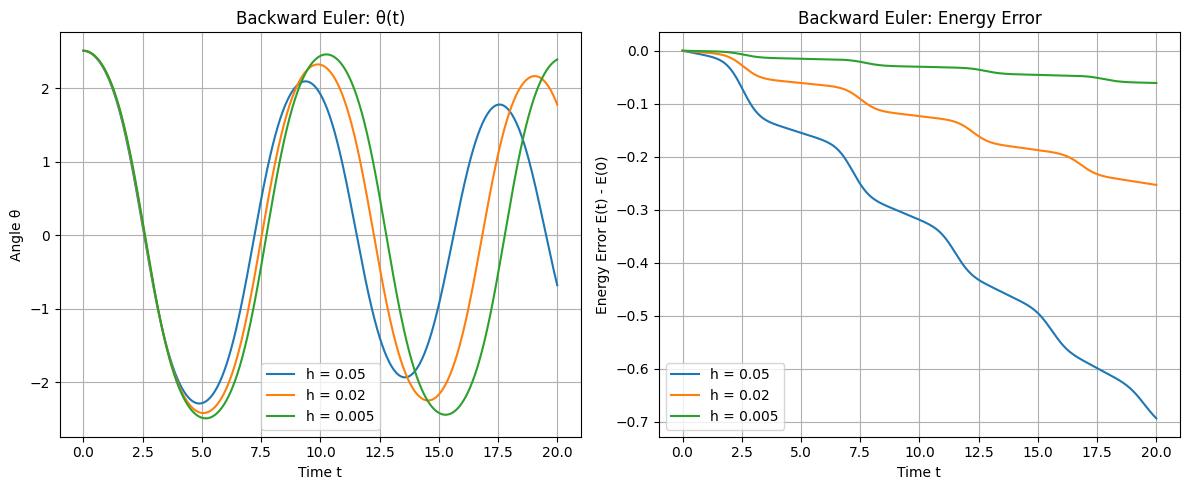

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def compute_energy(theta, omega):
    return 0.5 * omega**2 + (1 - np.cos(theta))

def backward_euler_pendulum(T_final, h):
    steps = int(T_final / h)
    t_vals = np.linspace(0, T_final, steps + 1)
    u = np.zeros((steps + 1, 2))
    E = np.zeros(steps + 1)

    # initial condition: θ(0) = 0.8π, dθ/dt(0) = 0
    u[0, 0] = 0.8 * np.pi
    E[0] = compute_energy(u[0, 0], u[0, 1])

    for n in range(steps):
        θn, ωn = u[n]

        # Define implicit system to solve for θ_{n+1} and ω_{n+1}
        def F(vars):
            θ_next, ω_next = vars
            return [
                θ_next - θn - h * ω_next,
                ω_next - ωn + h * np.sin(θ_next)
            ]

        θω_next = fsolve(F, [θn, ωn])  # Initial guess is previous state
        u[n + 1] = θω_next
        E[n + 1] = compute_energy(*θω_next)

    return t_vals, u, E

# Test with multiple step sizes
step_sizes = [0.05, 0.02, 0.005]
T_final = 20.0

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# θ(t) plot
for h in step_sizes:
    t, u, E = backward_euler_pendulum(T_final, h)
    axes[0].plot(t, u[:, 0], label=f"h = {h}")
axes[0].set(xlabel="Time t", ylabel="Angle θ", title="Backward Euler: θ(t)")
axes[0].legend()
axes[0].grid(True)

# Energy error plot
for h in step_sizes:
    t, u, E = backward_euler_pendulum(T_final, h)
    axes[1].plot(t, E - E[0], label=f"h = {h}")
axes[1].set(xlabel="Time t", ylabel="Energy Error E(t) - E(0)", title="Backward Euler: Energy Error")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Discussion

We applied the backward Euler method to the pendulum system using step sizes \( h = 0.05, 0.02, 0.005 \). This fully implicit scheme updates both θ (theta) and ω (omega) based on values at the next time step. At each iteration, a nonlinear system is solved using `fsolve`, ensuring stability even for stiff or oscillatory dynamics.

In the left plot, all trajectories remain bounded and oscillatory. Compared to explicit Euler, there is no rapid amplitude growth or unstable spirals. However, the trajectories exhibit a noticeable damping effect: the oscillation amplitude slowly decays, even though the true pendulum motion should be periodic and conserve energy.

The right plot shows the energy error \( E(t) - E(0) \). For all step sizes, energy decreases steadily over time, indicating artificial energy dissipation. The larger the time step, the greater the energy loss. With \( h = 0.05 \), energy drops significantly over the simulation window. As \( h \) decreases, the drift reduces, with \( h = 0.005 \) producing minimal error, close to the expected constant energy.

The backward Euler method is unconditionally stable, but not energy-conserving. The damping behavior stems from its numerical diffusion, which can be beneficial in stiff systems but undesirable in conservative dynamics like the pendulum. Despite this, the method remains robust and can prevent blow-up over long time intervals.

In conclusion, backward Euler provides excellent stability and suppresses instability observed in forward Euler. However, it sacrifices energy accuracy, making it less suitable for long-term simulation of conservative systems unless small time steps are used. It is best suited when stability is a priority and moderate accuracy is acceptable.

**3.4** Which of the methods, considered in 3.1--3.3, would you use for this problem? Justify your answer. Your answer and justification should not exceed $250$ words, and may refer to your plots and discussions in your solutions to 3.1--3.3.

**[5 marks]**

## Discussion

Among the three methods implemented—Forward Euler (3.1), Semi-Implicit Euler (3.2), and Backward Euler (3.3)—the **Semi-Implicit Euler method** offers the best overall performance for simulating the simple pendulum system.

The **Forward Euler method** is simple and easy to implement, but it performs poorly for long-term simulation of oscillatory systems. Our plots show a steady energy increase and growing oscillation amplitude due to artificial energy injection. Even with smaller step sizes, it fails to preserve the system’s conservative nature, making it unsuitable.

The **Backward Euler method** offers excellent stability and suppresses high-frequency oscillations, but this comes at the cost of significant energy dissipation and distorted dynamics. Our discussion shows that it overdamps the motion, causing the pendulum to spiral into equilibrium unrealistically. It also requires solving nonlinear equations at each step, adding computational cost.

By contrast, the **Semi-Implicit Euler method** (3.2) achieves a strong balance between accuracy, stability, and efficiency. It maintains bounded oscillatory motion, introduces only mild damping, and exhibits near-conservation of energy. Plots show that even with moderate step sizes, the energy error remains small and bounded, and the trajectory closely follows the expected behavior. It also avoids solving nonlinear systems, making it computationally efficient.

**Conclusion**: The Semi-Implicit Euler method is the most suitable for this problem. It preserves qualitative dynamics over long time intervals while being more stable than Forward Euler and less dissipative than Backward Euler.